# Steinkauz

## Notebook: no_dc_removal

In [1]:
# load project magics
try:
    %reload_ext steinkauz
except ModuleNotFoundError as msg:
    print(msg)
    print("steinkauz not installed?")

In [2]:
# set up steinkauz
%steinkauz --option setup --mainfile no_dc_removal --prefile mypackages --predir .

In [3]:
# import

# import Python module
import sys
import os
import numpy as np

# import IPython module
from IPython import display as disp
from IPython.display import Javascript
import ipywidgets as ipw
from ipywidgets import interact

# import user-defined modules
import no_dc_removal as dc

In [4]:
# Matploblib

# define matplotlib in one of the following three alternatives: notebook or inline (preferrably with retina) or ipympl
###%matplotlib notebook
###%matplotlib inline
###from IPython.display import set_matplotlib_formats
###set_matplotlib_formats('retina')
%matplotlib ipympl

# set default parameters
import matplotlib as mpl
# change to local matplotlibrc and edit the same parameters or set the rcParams below
### mpl.matplotlib_fname()                   # print location of matplotlibrc
mpl.rcParams['text.usetex'] = True           # use latex
### mpl.rcParams['ps.usedistiller'] = None   # 'ghostscript' or 'xpdf', but any difference?
mpl.rcParams['font.size'] = 11

# set pyplot
from matplotlib import pyplot as plt

In [5]:
# input toggle
%inputtoggle

Set the DPI and magnification of the screen output!

Then, run the entire script! Preparing the figures, especially the first one, is time-consuming: so, wait or reduce the defaults!

Lastly, you might want to "Toggle Jupyter input on/off" to see the Jupyter commands. 

In [6]:
# request DPI
dpi_box = ipw.BoundedIntText(value=300, min=1, max=sys.maxsize, step=1, description='DPI')

# interact with dpi box
@interact(dpi=dpi_box)
def dpi_update(**kwargs):
    # update dpi
    global dpi
    dpi = kwargs['dpi']


# request magnification
mag_box = ipw.BoundedFloatText(description="magnification", value=0.5, step=0.01)

# interact with mag box
@interact(mag=mag_box)
def mag_update(**kwargs):
    # update magnification
    global mag
    mag = kwargs['mag']


def button_action(*args):
    # do nothing but wake up Jupyter
    pass 
    
# click button
button =  ipw.Button(description = 'remember', button_style = 'info', tooltip = 'update calculations and graphics')
display(button)
button.on_click(button_action)

interactive(children=(BoundedIntText(value=300, description='DPI', max=9223372036854775807, min=1), Output()),…

interactive(children=(BoundedFloatText(value=0.5, description='magnification', step=0.01), Output()), _dom_cla…

Button(button_style='info', description='remember', style=ButtonStyle(), tooltip='update calculations and grap…

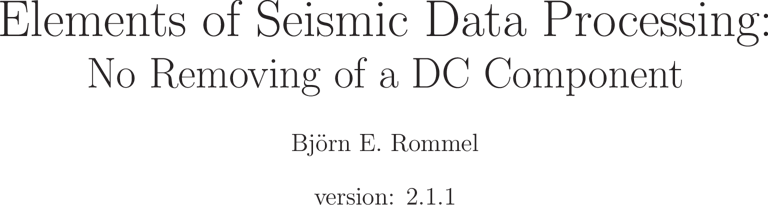

In [7]:
%%steinkauz --option notebook --dpi $dpi --mag $mag --texdir title --texfile title VERSION
r"""
\begin{titlepage}
    \title{\Huge Elements of Seismic Data Processing: \\ \huge No Removing of a DC Component}
    \author{Bj\"orn E. Rommel}
    \date{
        \begin{tabular}{cc}
            version: VERSION
        \end{tabular}}
    \end{titlepage}
\maketitle
"""

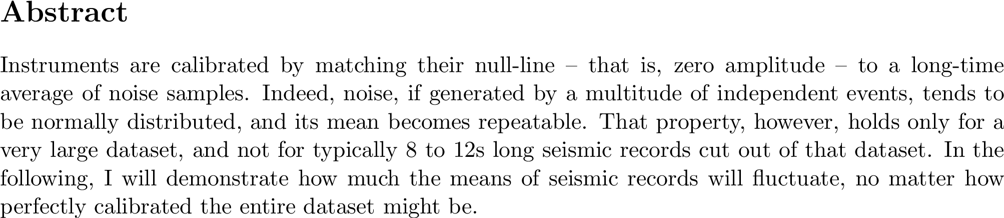

In [8]:
%steinkauz --dpi $dpi --mag $mag --texdir abstract --texfile abstract

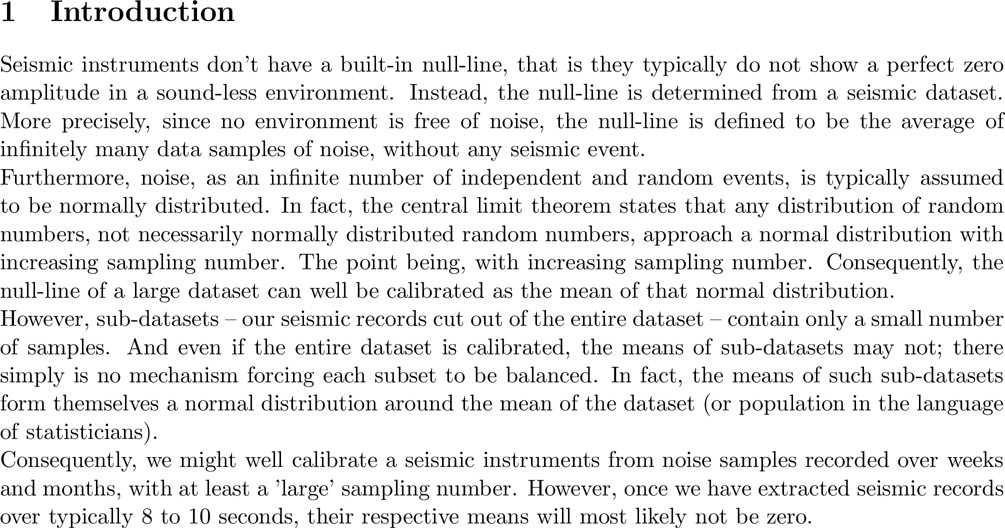

In [9]:
%steinkauz --dpi $dpi --mag $mag --texdir introduction --texfile introduction

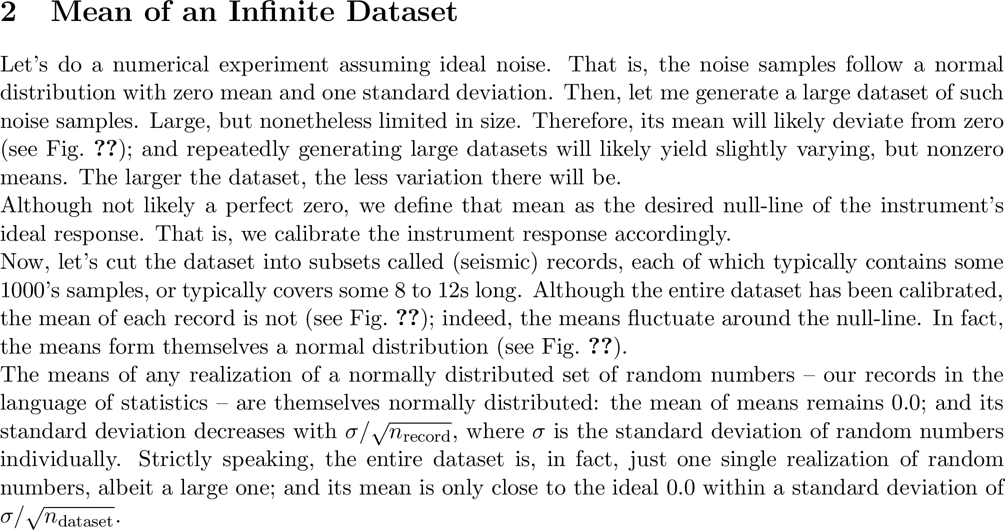

In [10]:
%steinkauz --dpi $dpi --mag $mag --texdir data --texfile data

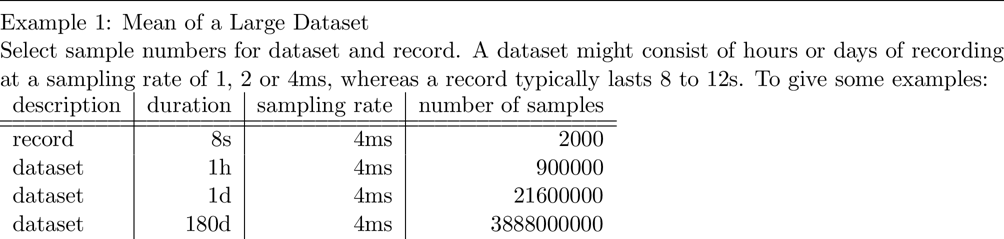

In [11]:
%steinkauz --dpi $dpi --mag $mag --texdir example --texfile example

In [12]:
# prepare input boxes for calculating a dataset mean

# histogram
COUNT = 9   # default number of equally-spaced bins in histogram (changeable, but > 0)

# sample numbers for comparison only (define whatever and replace dat_box.value or rec_box.value)
SAMPSEC = 250                # number of samples per second: e.g., 250 for 4ms sampling rate
NSREC = SAMPSEC * 8          # number of samples per 8s at 4ms sampling rate
NSMIN = SAMPSEC * 60         # number of samples per minute at 4ms sampling rate
NSHOUR = SAMPSEC * 60 * 60   # number of samples per hour at 4ms sampling rate
NSDAY = NSHOUR * 24          # number of samples per day at 4ms sampling rate
NS180DAY = NSDAY * 180       # number of samples per 180 days at 4ms sampling rate

# request number of data samples
dat_box = ipw.BoundedIntText(description="data sample number", min=2, max=sys.maxsize, value=NSHOUR)

# request number of record samples
rec_box = ipw.BoundedIntText(description="record sample sample", min=2, max=dat_box.value, value=NSREC)

# request number of bins in histogram
hist_box = ipw.BoundedIntText(description="bin number", min=1, value=COUNT)

In [13]:
# set up the input boxes and buttons

# data box
display(dat_box)

# record box
display(rec_box)

# histogram box
display(hist_box)

# boxes above are replicated below as they are sync'ed across cells and, thus, trigger actions in all those cells they
# are replicated

# request an update
button =  ipw.Button(description = 'update', button_style = 'info', tooltip = 'update calculations and graphics')
display(button)
button.on_click(button_action)

# update record box upon a change in data box:
# enforce max record samples <= data samples
def update_rec_box(*args):
    ### args[0]['new'] = dat_box.value
    global rec_box
    rec_box.max = dat_box.value
dat_box.observe(update_rec_box, 'value')

BoundedIntText(value=900000, description='data sample number', max=9223372036854775807, min=2)

BoundedIntText(value=2000, description='record sample sample', max=900000, min=2)

BoundedIntText(value=9, description='bin number', min=1)

Button(button_style='info', description='update', style=ButtonStyle(), tooltip='update calculations and graphi…

In [14]:
# generate, calibrate and display (noise) data
@interact(ns_dat=dat_box)
def update_data(**kwargs):
    # generate data
    global cal_data
    cal_data = dc.dataset(ns_dat=kwargs['ns_dat'])
    # prepare and run LaTeX
    %steinkauz --dpi $dpi --mag $mag --texdir dataset --texfile dataset DATAMEAN


# define an update button
def datbutton_action(*args):
    # wake up Jupyter
    pass

# interact with update button
datbutton =  ipw.Button(description = 'update', button_style = 'info', tooltip = 'update sample number and re-run')
display(datbutton)
datbutton.on_click(datbutton_action)

interactive(children=(BoundedIntText(value=900000, description='data sample number', max=9223372036854775807, …

Button(button_style='info', description='update', style=ButtonStyle(), tooltip='update sample number and re-ru…

In [ ]:
# update and display record means 
@interact(ns_dat=dat_box, ns_rec=rec_box)
def update_record(**kwargs):
    # compute records means 
    global rec_means, rec_std
    rec_means, rec_std = dc.record(data=cal_data, ns_dat=kwargs['ns_dat'], ns_rec=kwargs['ns_rec']) 
    # prepare and run LaTeX
    %steinkauz --dpi $dpi --mag $mag --texdir record --texfile caption --option notebook RECORDSTDRECORD RECORDSAMPLE RECORDSTDTHEORY
    
    
 # define an update button
def recbutton_action(*args):
    # wake up Jupyter
    pass

# interact with update button
recbutton =  ipw.Button(description = 'update', button_style = 'info', tooltip = 'update record number and re-run')
display(recbutton)
recbutton.on_click(recbutton_action)   

In [ ]:
# update histogram
@interact(ns_dat=dat_box, ns_rec=rec_box, ns_hist=hist_box)
def update_histogram(*args, **kwargs):
    # update and display histogram of record means
    dc.histogram(rec_means=rec_means, rec_std=rec_std, ns_hist=kwargs['ns_hist'])
    # prepare and run LaTeX on file
    %steinkauz --dpi $dpi --mag $mag --texdir histogram --texfile caption --option notebook RECORDSTDRECORD
    

# define an update button
def binbutton_action(*args):
    # wake up Jupyter
    pass

# interact with update button
binbutton =  ipw.Button(description = 'update', button_style = 'info', tooltip = 'update bin number and re-run')
display(binbutton)
binbutton.on_click(binbutton_action)

In [ ]:
%steinkauz --dpi $dpi --mag $mag --texdir conclusions --texfile conclusions

In [ ]:
# prepare final pdf file
# (uncomment and run to create the PDF file)
### %steinkauz --option printout --texdir . --texfile no_dc_removal

# define an update button
def printbutton_action(*args):
    %steinkauz --option printout --texdir . --texfile no_dc_removal

# interact with update button
printbutton =  ipw.Button(description = 'print', button_style = 'info', tooltip = 'create a PDF file')
display(printbutton)
printbutton.on_click(printbutton_action)

In [ ]:
# clean up
# (uncomment and run to clean up the directory)
### %steinkauz --option clean

# define an update button
def cleanbutton_action(*args):
    %steinkauz --option clean

# interact with update button
cleanbutton =  ipw.Button(description = 'clean', button_style = 'info', tooltip = 'clean directory')
display(cleanbutton)
cleanbutton.on_click(cleanbutton_action)

In [ ]:
# input toggle
%inputtoggle